In [17]:
"""Question 3"""

'Question 3'

In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import cluster
import collections
import operator
import matplotlib.pylab as plt
import os
import sys
import warnings

In [55]:
#a: Kmeans is a special case of EM Algorithm

In [56]:
%%latex
K-mean is a special case of EM algorithm. 
It sets the probability of hidden clusters given input $y_i$ and model parameter $\theta$, i.e., responsibilities $\gamma_{i}^{z}$ as binary 0 and 1.

<IPython.core.display.Latex object>

In [54]:
%%latex
1. E-step: Compute responsibilities $\gamma_{i}^{z}$ to determnine whether data $i$ belong to cluster $z$ or not.
$$
\gamma_{i}^{z} = 
\begin{cases}
    1, & \quad \text{when } z=\underset{z}{argmin} \parallel y_i-\mu_z \parallel \\
    0, & \quad \text{other}
\end{cases}
$$

<IPython.core.display.Latex object>

In [53]:
%%latex
2. M-step: Update new cluster centres based on responsibilities.
$$
\mu^{z}=\frac{\sum_{i=1}^{N}{\gamma_{i}^{z}y_i}}{\sum_{i=1}^{N}{\gamma_{i}^{z}}}
$$

3. Iterate E-step and M-step until $\gamma_{i}^{z}$ does not change or reaches maximum iteration.

<IPython.core.display.Latex object>

In [3]:
#b: Import data 
data = pd.read_csv(r'F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW3/EMM/faithful.dat', skiprows = 26, delimiter=r"\s+", names=['id', 'eruptions', 'waiting'])
data = data.drop(['id'], axis =1)
print (data.shape, "\n", data.head())

(272, 2) 
    eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


Text(0, 0.5, 'waiting')

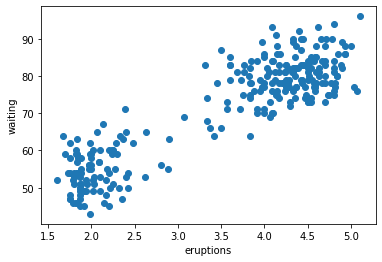

In [4]:
# Parse and plot all the data in 2D plane
plt.scatter(data['eruptions'], data['waiting'])
plt.xlabel('eruptions')
plt.ylabel('waiting')

In [5]:
#c: Fitting Gaussian-bimodal distribution
def Gaussian(data):
    clf = GaussianMixture(n_components=2, covariance_type='spherical', init_params='random')
    clf.fit(data)
    print ("No of steps needed for convergence is ", clf.n_iter_)
    return clf.n_iter_

In [13]:
# Plot trajectories of two mean vectors in 2-dimensions
if not sys.warnoptions:
    warnings.simplefilter("ignore")

clf = GaussianMixture(n_components=2, covariance_type='spherical', init_params='random', warm_start=True, max_iter=1)
clf.fit(data)

means1 = clf.means_[0]
means2 = clf.means_[1]

while (not clf.converged_):
    means1 = np.append(means1, clf.means_[0])
    means2 = np.append(means2, clf.means_[1])
    clf.fit(data)
length = len(means2)
print (length)
print (means1, "\n", means2)

22
[ 3.553681   71.75474281  3.553681   71.75474281  3.63371201 72.78955978
  3.80122152 74.93280261  4.07148465 78.23883498  4.27797922 80.42992638
  4.3215886  80.75738068  4.31255202 80.53724865  4.30357977 80.38438983
  4.29825768 80.31355451  4.29569169 80.2841132 ] 
 [ 3.42051106 70.02149023  3.42051106 70.02149023  3.33868125 68.96340945
  3.16427617 66.73167602  2.8390941  62.73787319  2.41323538 57.93379497
  2.22549049 55.9695833   2.15427524 55.31054945  2.11836474 54.97136858
  2.1048929  54.82995479  2.10031448 54.77612238]


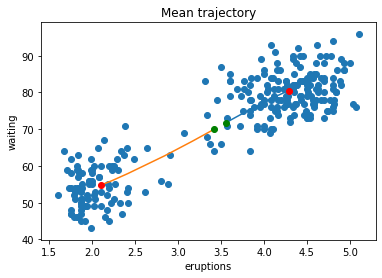

In [14]:
# Plot the means 
means1 = means1.reshape((-1,2))
means2 = means2.reshape((-1,2))
means1 = pd.DataFrame({'x': means1[:,0], 'y': means1[:,1]})
means2 = pd.DataFrame({'x': means2[:,0], 'y': means2[:,1]})

plt.plot(means1['x'], means1['y'], label = 'mean1')
plt.plot(means2['x'], means2['y'], label = 'mean2')

plt.plot(means1['x'][:1], means1['y'][:1], 'o-',c='green', label="start")
plt.plot(means2['x'][:1], means2['y'][:1], 'o-',c='green')

plt.plot(means1['x'][-1:], means1['y'][-1:], 'o-',c='red', label="end")
plt.plot(means2['x'][-1:], means2['y'][-1:], 'o-',c='red')

plt.scatter(data['eruptions'], data['waiting'])
plt.xlabel('eruptions')
plt.ylabel('waiting')

plt.title('Mean trajectory')
plt.show()

In [15]:
# Termination Criteria
"""The termination criteria was to continue iterating until the function converges (using converge_ function defined in scikit learn). I believed this would produce the greatest accuracy with a reasonable number of iterations. """

'The termination criteria was to continue iterating until the function converges (using converge_ function defined in scikit learn). I believed this would produce the greatest accuracy with a reasonable number of iterations. '

In [8]:
# Run GMM model for 50 times and plot the distribution
iterations = []
for i in range(50):
    step = Gaussian(data)
    iterations.append(step)
counts = collections.Counter(iterations)
max_count = sorted(counts.items(), key=operator.itemgetter(1))[-1][1]
max_step = sorted(counts.items(), key=operator.itemgetter(0))[-1][0]

No of steps needed for convergence is  2
No of steps needed for convergence is  10
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  10
No of steps needed for convergence is  2
No of steps needed for convergence is  2
No of steps needed for convergence is  2
No of steps needed for convergence is  2
No of steps needed for convergence is  11
No of steps needed for convergence is  12
No of steps needed for convergence is  2
No of steps needed for convergence is  10
No of steps needed for convergence is  9
No of steps needed for convergence is  11
No of steps needed for convergence is  2
No of steps needed for convergence is  10
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  11
No of steps needed for convergence is  2
N

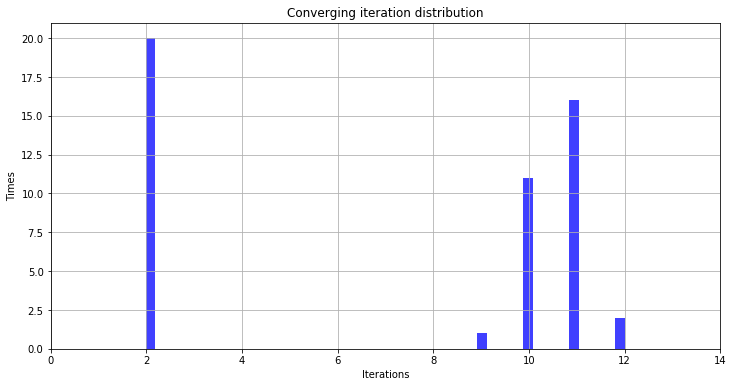

In [9]:
# Plot bar graph for 50 run
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
n, bins, patches = plt.hist(iterations, len(iterations)+2, facecolor='b', alpha=0.75)
plt.xlabel('Iterations')
plt.ylabel('Times')
plt.title('Converging iteration distribution')
plt.axis([0, max_step+2, 0, max_count+1])
plt.grid(True)
plt.show()

In [10]:
# d: K-mean neighbor distribution
def Gaussian_kmean(data, data_mean, data_covar, data_label):
    clf = GaussianMixture(n_components=2, covariance_type='spherical', precisions_init=1/data_covar, means_init=data_means,
                          init_params='kmeans', weights_init=pd.Series(data_label).value_counts(normalize=True,sort=False))
    clf.fit(data)
    print ("No of steps needed for convergence is ", clf.n_iter_)
    return clf.n_iter_

In [11]:
# Estimate the first guess of the mean and covariance matrices using maximum likelihood over the labeled data points
clf = cluster.KMeans(n_clusters=2, init = 'random')
clf.fit(data)

clusters = clf.labels_
data1 = data[clusters == 0]
data2 = data[clusters == 1]
data1_mean = np.array(data1.mean(axis = 0))
data2_mean = np.array(data2.mean(axis = 0))
data_means = np.concatenate((data1_mean, data2_mean)).reshape(2,2)

data1_var = data1.var().mean()
data2_var = data2.var().mean()

data_covar = np.array([data1_var, data2_var])

gmm_kmeans_init = GaussianMixture(n_components=2, covariance_type = 'spherical', warm_start=True, means_init=data_means,
                                  weights_init=pd.Series(clf.labels_).value_counts(normalize=True, sort=False),
                                  precisions_init=1/data_covar).fit(data)

No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps needed for convergence is  6
No of steps need

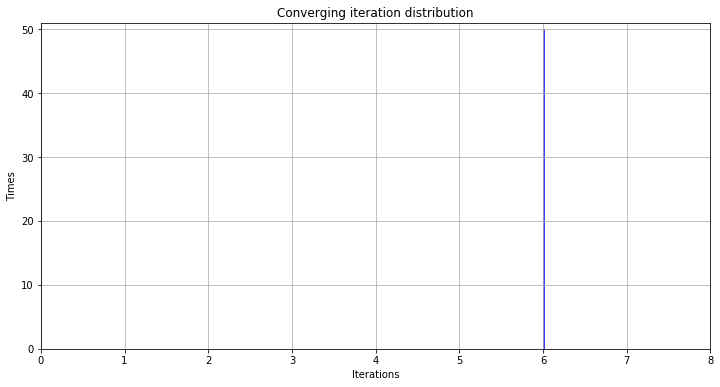

In [12]:
# Run GMM model for 50 times and plot the distribution
iterations = []
for i in range(50):
    step = Gaussian_kmean(data, data_means, data_covar, clf.labels_)
    iterations.append(step)
counts = collections.Counter(iterations)
max_count = sorted(counts.items(), key=operator.itemgetter(1))[-1][1]
max_step = sorted(counts.items(), key=operator.itemgetter(0))[-1][0]

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
n, bins, patches = plt.hist(iterations, len(iterations)+2, facecolor='b', alpha=0.75)
plt.xlabel('Iterations')
plt.ylabel('Times')
plt.title('Converging iteration distribution')
plt.axis([0, max_step+2, 0, max_count+1])
plt.grid(True)
plt.show()

In [16]:
# Compare between part (a) and (b)
"""As shown by the histogram above, when k means is utilized to cluster, convergence is reached quicker. This is because we are using kmeans to allocate cluster centre as opposed to randomly assigning, which makes it better as the dataset is seperable to begin with and that is identified by the algorithm."""

'As shown by the histogram above, when k means is utilized to cluster, convergence is reached quicker. This is because we are using kmeans to allocate cluster centre as opposed to randomly assigning, which makes it better as the dataset is seperable to begin with and that is identified by the algorithm.'